In [1]:
import numpy as np
import pyfits
import math
from math import log10
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from matplotlib import rc
import pickle
import os
import astropy as ap
from astropy.cosmology import WMAP7
from scipy import interpolate
import corner
import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors
from __future__ import unicode_literals
# rcParams["font.size"] = 16
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'

# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = 'Ubuntu'
# rcParams['font.monospace'] = 'Ubuntu Mono'
rcParams['font.size'] = 20
rcParams['axes.labelsize'] = 20
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 16
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 1

os.chdir('/Users/nitya/Work/Data/Project1/measurements')



In [2]:
os.chdir('/Users/nitya/Work/Data/Project1/measurements')
print(os.getcwd())
file2 = open(r'tracer_bin_opt_inf.pkl', 'rb')
d = pickle.load(file2, encoding = 'Latin1')
file2.close()
#What's up with 445?

print(np.shape(d))

file3 = open(r'tracer_bins_nsaid.pkl', 'rb')
b = pickle.load(file3, encoding = 'Latin1')
file3.close()

b.dtype.names

print(len(b))


# indz = np.where(d[:,0]!=445)[0]
# d = d[indz]
# print np.shape(d)
bins = [np.int(d[:,0][i]) for i in range(len(d[:,0]))]
res = [bins[i]- np.int(b[:,0][i]) for i in range(len(bins))]

binlist = b[:,1]
#print(binlist[0:5])


/Users/nitya/Work/Data/Project1/measurements
(467, 3)
467


In [3]:
afile = open(r'interpolated_data_radec.pkl', 'rb')
d = pickle.load(afile, encoding = 'latin1')
afile.close()
print(d.dtype.names)
print(len(d))

green_valley = len(d['opt'][(d['opt']>2.5) & (d['opt']<4.5)])

outliers = len(d['opt'][(d['opt']>2.5) & (d['opt']<4.5) & (d['inf']>1.5)])
print(green_valley, outliers, outliers*100/green_valley)

('nsaid', 'z', 'ra', 'dec', 'opt', 'inf', 'mass', 'magsfr', 'magphys', 'uv', 'uvssfr', 'env')
61046
26267 3734 14.21555564015685


So ~ 14.2% of the green valley are the outliers;

['wise2010-W1', 'wise2010-W2', 'wise2010-W3', 'wise2010-W4']
34002.54044481694


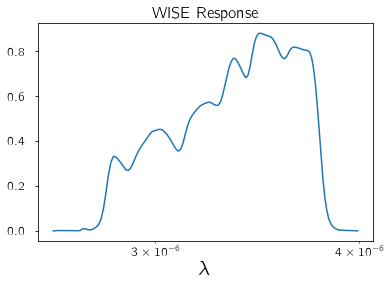

In [4]:
import speclite
from speclite import filters
wise = speclite.filters.load_filters('wise2010-*')
print(wise.names)
w1band = speclite.filters.load_filter('wise2010-W1')
w2band = speclite.filters.load_filter('wise2010-W2')
w3band = speclite.filters.load_filter('wise2010-W3')
w4band = speclite.filters.load_filter('wise2010-W4')
wave_w1 = (w1band.wavelength)*(10**(-10))
resp = w1band.response
eff = w1band.effective_wavelength.value
print(eff)

plt.plot(wave_w1,resp)
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.title('WISE Response')
plt.show()


/Users/nitya/Work/Data/Project1/measurements
[0.04035187 0.33866848 0.63698509 0.9353017  1.23361832 1.53193493
 1.83025154 2.12856815 2.42688477 2.72520138 3.02351799 3.3218346
 3.62015121 3.91846783 4.21678444 4.51510105 4.81341766 5.11173428
 5.41005089 5.7083675  6.00668411 6.30500072 6.60331734 6.90163395
 7.19995056 7.49826717]
[-2.99099922 -2.75259926 -2.5141993  -2.27579933 -2.03739937 -1.7989994
 -1.56059944 -1.32219948 -1.08379951 -0.84539955 -0.60699959 -0.36859962
 -0.13019966  0.1082003   0.34660027  0.58500023  0.82340019  1.06180016
  1.30020012  1.53860008  1.77700005  2.01540001  2.25379997  2.49219994
  2.7305999   2.96899986]
0.29831661224365236
0.23839996337890623


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10


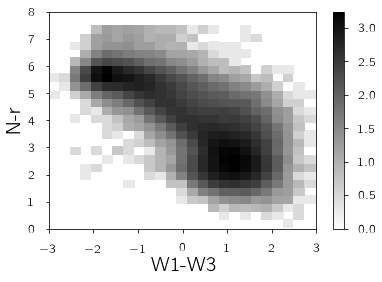

In [5]:
os.chdir('/Users/nitya/Work/Data/Project1/measurements')
print(os.getcwd())


afile = open(r'interpolated_data.pkl', 'rb')
dat = pickle.load(afile, encoding = 'latin1')
afile.close()

afile = open(r'SFRP.pkl', 'rb')
d = pickle.load(afile, encoding = 'latin1')
afile.close()
#print(dat2.dtype.names)

#Getting colors, kcorrect, fluxes
# There's one annoying 0 thing in N band nmgy_ivar - removing it!
indf = np.where(np.asarray(d['NMGY_IVAR'])[:,1]>0)[0]

d = np.asarray(d[indf])
ind = d['NSAID']
z = d['Z']
mtol = d['MTOL']
kc = d['KCORRECT']
mass = d['MASS']
opt = [d['ABSMAG'][:,1][i]-d['ABSMAG'][:,4][i] for i in range(len(ind))]
inf = [d['W1MAG'][i]-d['W3MAG'][i] for i in range(len(ind))]


h = binned_statistic_2d(inf,opt,ind,statistic = 'count',bins = (25,25))

yedges = h[1]
xedges = h[2]

print(xedges)
print(yedges)

print(xedges[2]-xedges[1])
print(yedges[2]-yedges[1])

xbins = [0.5*(h[1][i] + h[1][i+1]) for i in range(25)]
ybins = [0.5*(h[2][i] + h[2][i+1]) for i in range(25)]
extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
number = np.ma.array(h[0], mask = h[0] == 0)
number = np.log10(number)

plt.pcolormesh(yedges,xedges,(np.transpose(number)),cmap = plt.cm.binary)
plt.colorbar()
# plt.xlim(0,0.056)
# plt.ylim(min(gr),max(gr))
plt.ylim(0,8.0)
plt.xlim(-3.0,3.0)
plt.xlabel('W1-W3')
plt.ylabel('N-r')
plt.show()


#Writing out this integral: K = -2.5log10((1/(1+z))(I1/I2))

I1, I2 are convolutions with functions/arrays f1,f2 for specified filters;

f1: w*L(w/1+z)
f2: w*L(w)

In [6]:
#t = binned_statistic_2d(inf,opt,nsaid,statistic = 'count',bins = (25,25))

bl = h[3]
print(len(bl))
print(len(np.unique(bl)))


def f1(lam):
    x = lam/(1+z)
    fc = np.interp(x, 10**wav, us1)
    thing = lam*(10**fc)
    return thing

def f2(lam):
    fc = np.interp(lam, 10**wav, us1)
    thing = lam*(10**fc)
    return thing


  

75475
467


In [7]:
os.chdir('/Users/nitya/Work/Data/Project1/magphys')

b = np.unique(bl)

ble = np.vectorize(np.float)
sed = []

for i in range(len(b)):
    ind = np.int(b[i])
    f = str(bl[i]) + '.0' + '.sed'
    lines2 = open(f).readlines()[10:]
    se = np.asarray([ble(lines2[j].split()) for j in range(12816)])
    sed.append(se)
    



In [8]:
sed = np.asarray(sed)
print(len(sed))
print(np.shape(sed))
print(sed[10][:,0][0:10])
#print(b)

467
(467, 12816, 3)
[1.959041 1.973128 1.982271 1.991226 2.       2.0086   2.017033 2.025306
 2.033424 2.041393]


In [9]:
#Reading the Magphys spectra..;
#os.chdir('/Users/nitya/Work/Data/Project1/Magphys')

#print(b)
# print(bl[i])


kc1 = []
kc2 = []
kc3 = []
kc4 = []
for i in range(len(bl)):
#     ind = np.int(bl[i])
#     file2 = str(bl[i]) + '.0' + '.sed'
#     lines2 = open(file2).readlines()[10:]
#     #print(np.shape(lines2))
#     ble = np.vectorize(np.float)
#     sed = np.asarray([ble(lines2[j].split()) for j in range(12816)])
    z = d['Z'][i]
    ind = np.where(b==bl[i])[0]
    
    #print(ind)
    l = np.reshape(sed[ind],(12816,3))
    #print(l[0:10])
    wav = l[:,0]
    #wav = [10**(sed[ind][:,0][j]) for j in range(len(sed[ind][:,0]))]
    #print(wav[0:20])
    #unattennuated
    #us = sed[inn][:,2]
    #attennuated
    #wav = [10**(sed[ind][:,0][j]) for j in range(len(sed[ind][:,0]))]
    us1 = l[:,1]
    #print(us1[0:10])


    a1 = w1band.convolve_with_function(f1)
    c1 = w1band.convolve_with_function(f2)
    kcorr1 = np.float(-2.5*(np.log10((1/(1+z))*a1/c1)))
    kc1.append(kcorr1)

    a2 = w2band.convolve_with_function(f1)
    c2 = w2band.convolve_with_function(f2)
    kcorr2 = np.float(-2.5*(np.log10((1/(1+z))*a2/c2)))
    kc2.append(kcorr2)

    a3 = w3band.convolve_with_function(f1)
    c3 = w3band.convolve_with_function(f2)
    kcorr3 = np.float(-2.5*(np.log10((1/(1+z))*a3/c3)))
    kc3.append(kcorr3)

    a4 = w4band.convolve_with_function(f1)
    c4 = w4band.convolve_with_function(f2)
    kcorr4 = np.float(-2.5*(np.log10((1/(1+z))*a4/c4)))
    kc4.append(kcorr4)
    

print(kc1[0:5])
print(kc2[0:5])
print(kc3[0:5])
print(kc4[0:5])

[-0.05157979460206025, -0.12873499196491114, -0.12226074019510828, -0.08375942785727321, -0.128575241014666]
[-0.05026596930533616, -0.14813916079066516, -0.13994973235043381, -0.08010839784277356, -0.11170241784856651]
[-0.046393699131920346, -0.03646408855546685, -0.10167284355675613, -0.011249021724651337, -0.06507654683204632]
[0.09418985258381149, 0.07206198162796054, 0.02907798195105497, 0.09619688330037535, 0.15102121025199605]


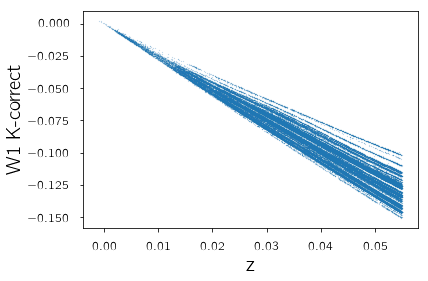

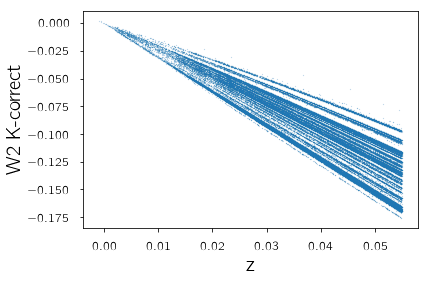

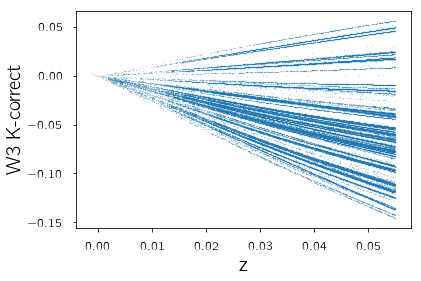

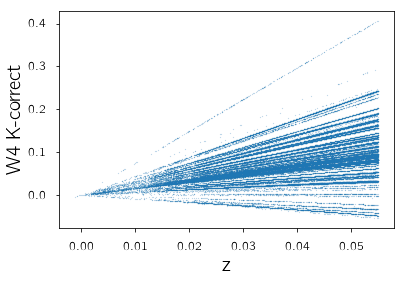

In [10]:
plt.scatter(d['Z'],kc1, s = 0.01)
plt.xlabel('z')
plt.ylabel('W1 K-correct')
plt.show()


plt.scatter(d['Z'],kc2, s = 0.01)
plt.xlabel('z')
plt.ylabel('W2 K-correct')
plt.show()

plt.scatter(d['Z'],kc3, s = 0.01)
plt.xlabel('z')
plt.ylabel('W3 K-correct')
plt.show()

plt.scatter(d['Z'],kc4, s = 0.01)
plt.xlabel('z')
plt.ylabel('W4 K-correct')
plt.show()




/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


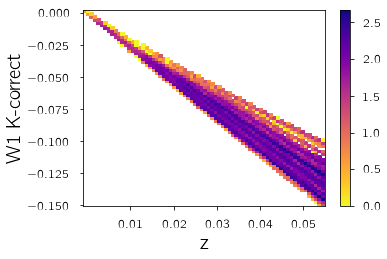

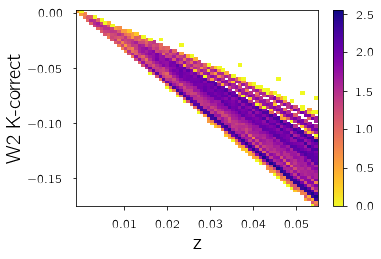

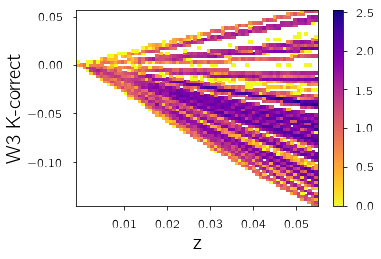

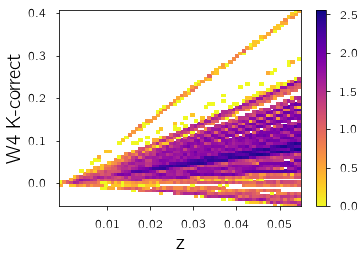

In [11]:
os.chdir('/Users/nitya/Desktop')

def thing(x,y):
    h = binned_statistic_2d(x,y,y,statistic = 'count',bins = (70,70))
    yedges = h[1]
    xedges = h[2]
    number = np.ma.array(h[0], mask = h[0] == 0)
    number = np.log10(number)
    plt.pcolormesh(yedges,xedges,(np.transpose(number)),cmap = plt.cm.plasma_r)
    plt.colorbar()

thing(d['Z'],kc1)
plt.xlabel('z')
plt.xticks([0.01,0.02,0.03,0.04,0.05])
plt.ylabel('W1 K-correct')
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2)
plt.savefig('W1 K-correct')
plt.show()

thing(d['Z'],kc2)
plt.xlabel('z')
plt.xticks([0.01,0.02,0.03,0.04,0.05])
plt.ylabel('W2 K-correct')
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2)
plt.savefig('W2 K-correct')
plt.show()

thing(d['Z'],kc3)
plt.xlabel('z')
plt.xticks([0.01,0.02,0.03,0.04,0.05])
plt.ylabel('W3 K-correct')
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2)
plt.savefig('W3 K-correct')
plt.show()

thing(d['Z'],kc4)
plt.xlabel('z')
plt.xticks([0.01,0.02,0.03,0.04,0.05])
plt.ylabel('W4 K-correct')
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2)
plt.savefig('W4 K-correct')
plt.show()


In [14]:
os.chdir('/Users/nitya/Work/Data/Project1/measurements')
print(os.getcwd())

whoa = (np.array(list(zip(d['NSAID'],d['Z'],kc1,kc2,kc3,kc4)), 
                dtype=[('nsaid','float'), ('z','float'),('kc1','float'),('kc2','float'),
                       ('kc3','float'),('kc4','float')]))

print(whoa.dtype.names)

afile = open(r'WISE_kcorrects_a', 'wb')
pickle.dump(whoa, afile)
afile.close()

/Users/nitya/Work/Data/Project1/measurements
('nsaid', 'z', 'kc1', 'kc2', 'kc3', 'kc4')


In [12]:

# one = ap.units.Quantity(1.)
# numer = w1band.convolve_with_function(lambda wlen: wlen)
# denom = w1band.convolve_with_function(lambda wlen: one)
# print(numer)
# print(denom)
# print(np.round(numer / denom, 1))

# z = 0.05491536


# ##Testing functions: Can you get back the effective wavelength?
# def test1(lam):
#     blah = lam
#     return blah

# def test2(lam):
#     blah = 1.0
#     return blah

# print(trial1)
# print(trial2)
# print(trial1/trial2)


# ## Defining 2 functions of wavelength...

# def f1(lam):
#     x = lam/(1+z)
#     fc = np.interp(x, 10**wav, us1)
#     thing = lam*(10**fc)
#     return thing

# def f2(lam):
#     fc = np.interp(lam, 10**wav, us1)
#     thing = lam*(10**fc)
#     return thing

# print(10**wav[0:10])
# print(us1[0:10])
# print(f2(93.5))

# trial1 = w1band.convolve_with_function(test1)
# trial2 = w1band.convolve_with_function(test2)


# a = w1band.convolve_with_function(f1)
# b = w1band.convolve_with_function(f2)

# print(a,b)

# kcorr = -2.5*(np.log10(a/b))
# print(kcorr)



# print(dat.dtype.names)
# print(len(dat))
# print(binlist[300])
# gal = np.random.choice(binlist[400])
# print(gal)
# #z = np.asarray([dat['z'][np.where(dat['nsaid'] == np.array(binlist[100][i]))[0]] for i in range(len(binlist[100]))])
# z = dat['z'][np.where(dat['nsaid']==gal)]
# print(z)



# #print(wave_w1)
# # wl = np.power(10,np.asarray(sed[1][:,0]))

# # #print(wl, len(wl), wl[6400:6700])


# # lum = []
# # #attennuated
# # alum = []

# # lum1 = []
# # #attennuated
# # alum1 = []

# for i in range(len(bins)):
#     wav = np.power(10,np.asarray(sed[i][:,0]))
#     us = np.power(10,np.asarray(sed[i][:,2]))
#     s = np.power(10,np.asarray(sed[i][:,1]))
#     print(len(wav),len(us),len(s))
    
# #     #print(np.any(np.diff(wl <= 0)))
# #     spec = [wl[j]*s[j] for j in range(len(wl))]
# #     uspec = [wl[j]*us[j] for j in range(len(wl))]
# #     #print(wl[6400:6700],s[6400:6700])
# #     stuff1 = w1band.convolve_with_array(wl[6400:6700],s[6400:6700],photon_weighted=False)
# #     ustuff1 = w1band.convolve_with_array(wl,us,photon_weighted=False)
# #     stuff = w1band.convolve_with_array(wl,spec,photon_weighted=False)
# #     ustuff = w1band.convolve_with_array(wl,uspec,photon_weighted=False)
# #     #print(stuff1,ustuff1,stuff,ustuff)
# #     #ab = w1band.get_ab_magnitude(s[0:6000])
# #     alum.append(stuff)
# #     lum.append(ustuff)
# #     #maggie.append(ab)
# #     alum1.append(stuff1)
# #     lum1.append(ustuff1)

